## 1 - Introduction

- Nama : Fadhil Muhammad Irfan

**OBJECTIVE**

- Exploratory Data Analysis of AAVE, ALGO, BTC, DOGE, ETH, SHIB price

**DATASET INFORMATION**
1. Unix - This is the unix timestamp or also known as "Epoch Time". Use this to convert to your local timezone
2. Date - This timestamp is converted to NY EST Standard Time
3. Symbol - The symbol for which the timeseries data refers
4. Open - This is the opening price of the time period
5. High - This is the highest price of the time period
6. Low - This is the lowest price of the time period
7. Close - This is the closing price of the time period
8. Volume (Crypto) - This is the volume in the transacted Ccy. Ie. For BTC/USDT, this is in BTC amount
9. Volume Base Ccy - This is the volume in the base/converted ccy. Ie. For BTC/USDT, this is in USDT amount
10. Trade Count - This is the unique number of trades for the given time period

## 2 - Import Library

In [123]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3 - Data Loading

In [8]:
data_aave = pd.read_csv('Binance_AAVEUSDT_d.csv', skiprows=1)
data_algo = pd.read_csv('Binance_ALGOUSDT_d.csv', skiprows=1)
data_btc = pd.read_csv('Binance_BTCUSDT_d.csv')
data_doge = pd.read_csv('Binance_DOGEUSDT_d.csv', skiprows=1)
data_eth = pd.read_csv('Binance_ETHUSDT_d.csv', skiprows=1)
data_shib = pd.read_csv('Binance_SHIBUSDT_d.csv', skiprows=1)

data_aave.head()

,unix,date,symbol,open,high,low,close,Volume AAVE,Volume USDT,tradecount
0,1657065600000,2022-07-06 00:00:00,AAVE/USDT,60.6,61.5,60.6,61.1,1670.362,1.019941e+05,354
1,1656979200000,2022-07-05 00:00:00,AAVE/USDT,63.1,64.4,57.9,60.7,242432.290,1.476901e+07,38400
2,1656892800000,2022-07-04 00:00:00,AAVE/USDT,57.7,63.4,56.1,63.1,222520.270,1.324869e+07,38865
3,1656806400000,2022-07-03 00:00:00,AAVE/USDT,57.9,58.6,54.7,57.7,137330.878,7.785903e+06,22321
4,1656720000000,2022-07-02 00:00:00,AAVE/USDT,56.4,58.5,54.8,57.9,172300.429,9.771941e+06,26682


In [10]:
data_algo.head()

,unix,date,symbol,open,high,low,close,Volume ALGO,Volume USDT,tradecount
0,1657065600000,2022-07-06 00:00:00,ALGO/USDT,0.3078,0.3095,0.3072,0.3090,297702.0,9.182990e+04,373
1,1656979200000,2022-07-05 00:00:00,ALGO/USDT,0.3197,0.3230,0.3012,0.3078,29966506.0,9.356102e+06,41814
2,1656892800000,2022-07-04 00:00:00,ALGO/USDT,0.3096,0.3211,0.2999,0.3196,31432233.0,9.791161e+06,40114
3,1656806400000,2022-07-03 00:00:00,ALGO/USDT,0.3076,0.3155,0.3011,0.3096,23535490.0,7.241767e+06,33454
4,1656720000000,2022-07-02 00:00:00,ALGO/USDT,0.3065,0.3120,0.2989,0.3076,39577636.0,1.206230e+07,53412


In [11]:
data_btc.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.657066e+12,2022-07-06 00:00:00,BTC/USDT,20175.84,20265.28,20174.46,20213.78,809.73146,1.637333e+07,12394.0
1,1.656979e+12,2022-07-05 00:00:00,BTC/USDT,20236.71,20750.00,19304.40,20175.83,96041.13756,1.919950e+09,1612273.0
2,1.656893e+12,2022-07-04 00:00:00,BTC/USDT,19315.83,20354.01,19055.31,20236.71,74814.04601,1.470988e+09,1282843.0
3,1.656806e+12,2022-07-03 00:00:00,BTC/USDT,19252.82,19647.63,18781.00,19315.83,51087.46631,9.802559e+08,880786.0
4,1.656720e+12,2022-07-02 00:00:00,BTC/USDT,19279.80,19467.39,18977.01,19252.81,46180.30210,8.884155e+08,833508.0


In [12]:
data_doge.head()

,unix,date,symbol,open,high,low,close,Volume DOGE,Volume USDT,tradecount
0,1657065600000,2022-07-06 00:00:00,DOGE/USDT,0.06716,0.06751,0.06702,0.06726,5863194.0,3.948067e+05,1322
1,1656979200000,2022-07-05 00:00:00,DOGE/USDT,0.06937,0.07002,0.06550,0.06716,634033746.0,4.299450e+07,128561
2,1656892800000,2022-07-04 00:00:00,DOGE/USDT,0.06721,0.06981,0.06566,0.06938,647421086.0,4.385520e+07,119132
3,1656806400000,2022-07-03 00:00:00,DOGE/USDT,0.06667,0.06750,0.06482,0.06721,437895956.0,2.897424e+07,85450
4,1656720000000,2022-07-02 00:00:00,DOGE/USDT,0.06645,0.06800,0.06550,0.06667,618971181.0,4.135043e+07,127773


In [13]:
data_eth.head()

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount
0,1.657066e+12,2022-07-06 00:00:00,ETH/USDT,1132.51,1140.31,1132.45,1136.96,1.823155e+04,2.073394e+07,11099.0
1,1.656979e+12,2022-07-05 00:00:00,ETH/USDT,1151.01,1174.90,1076.34,1132.50,1.398961e+06,1.578654e+09,1130646.0
2,1.656893e+12,2022-07-04 00:00:00,ETH/USDT,1074.26,1160.90,1045.37,1151.00,1.150109e+06,1.266935e+09,842895.0
3,1.656806e+12,2022-07-03 00:00:00,ETH/USDT,1067.01,1088.34,1040.78,1074.26,6.447463e+05,6.860565e+08,562962.0
4,1.656720e+12,2022-07-02 00:00:00,ETH/USDT,1059.73,1078.88,1028.29,1067.01,7.148121e+05,7.528137e+08,608900.0


In [14]:
data_shib.head()

,unix,date,symbol,open,high,low,close,Volume SHIB,Volume USDT,tradecount
0,1657065600000,2022-07-06 00:00:00,SHIB/USDT,0.00001,0.000010,0.00001,0.00001,4.211509e+10,4.359926e+05,972
1,1656979200000,2022-07-05 00:00:00,SHIB/USDT,0.00001,0.000011,0.00001,0.00001,6.604402e+12,6.899562e+07,145519
2,1656892800000,2022-07-04 00:00:00,SHIB/USDT,0.00001,0.000011,0.00001,0.00001,3.727388e+12,3.812929e+07,97432
3,1656806400000,2022-07-03 00:00:00,SHIB/USDT,0.00001,0.000010,0.00001,0.00001,2.321695e+12,2.319925e+07,67493
4,1656720000000,2022-07-02 00:00:00,SHIB/USDT,0.00001,0.000010,0.00001,0.00001,2.413180e+12,2.426458e+07,68717


## 4 - Exploratory Data Analysis

In [43]:
data_aave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         629 non-null    int64  
 1   date         629 non-null    object 
 2   symbol       629 non-null    object 
 3   open         629 non-null    float64
 4   high         629 non-null    float64
 5   low          629 non-null    float64
 6   close        629 non-null    float64
 7   Volume AAVE  629 non-null    float64
 8   Volume USDT  629 non-null    float64
 9   tradecount   629 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 49.3+ KB


Assuming AAVE dataset can represents the other datasets Dtype, so based on `.info()`:
1. Column date is detected as an object, so at the preprocessing it will be change into datetime 
2. Other columns has the correct dtype 

**CHECK MISSING VALUES**

In [29]:
print('AAVE Missing Values = ', data_aave.isnull().sum().sum())
print('ALGO Missing Values = ', data_algo.isnull().sum().sum())
print('BTC Missing Values = ', data_btc.isnull().sum().sum())
print('DOGE Missing Values = ', data_doge.isnull().sum().sum())
print('ETHU Missing Values = ', data_eth.isnull().sum().sum())
print('SHIB Missing Values = ', data_shib.isnull().sum().sum())

AAVE Missing Values =  0
ALGO Missing Values =  0
BTC Missing Values =  124
DOGE Missing Values =  0
ETHU Missing Values =  124
SHIB Missing Values =  0


According to the operation above :
1. There are no missing values found in AAVE, ALGO, DOGE, and SHIB datasets
2. Missing values is found in BTC and ETHU with 124 missing values detected

Finding which columns has a missing values on BTC and ETHU datasets 

In [42]:
print('BTC =','\n', data_btc.isnull().sum())
print('*'*50)
print('ETH=', '\n', data_eth.isnull().sum())

BTC = 
 unix             0
date             0
symbol           0
open             0
high             0
low              0
close            0
Volume BTC       0
Volume USDT      0
tradecount     124
dtype: int64
**************************************************
ETH= 
 unix             0
date             0
symbol           0
open             0
high             0
low              0
close            0
Volume ETH       0
Volume USDT      0
tradecount     124
dtype: int64


According to operation above :
- The missing values comes from tradecount column

**AAVE OHLC GRAPH**

In [46]:
fig = go.Figure(data=[go.Candlestick(x=data_aave['date'],
                open=data_aave['open'], high=data_aave['high'],
                low=data_aave['low'], close=data_aave['close'])
                     ])


fig.update_layout(title='AAVE Price between Oct 2020 to Jul 2022', 
               xaxis_title ='Date' ,
               yaxis_title = 'AAVE',
               xaxis_rangeslider_visible=False)
fig.show()

Based on OHLC Graph above:
- The price of AAVE is increasing starting from jan 2021. 
- The period where AAVE price is at the highest is around Feb 2021 to May 2021. Furthermore, during that time, the AAVE price is highly volatile compare to other dates
- The price start to decrease after May 2021. 
- July 2022, is the lowest price of AAVE since May 2021

**ALGO OHLC GRAPH**

In [50]:
fig = go.Figure(data=[go.Candlestick(x=data_algo['date'],
                open=data_algo['open'], high=data_algo['high'],
                low=data_algo['low'], close=data_algo['close'])
                     ])


fig.update_layout(title='ALGO Price between Jan 2022 to Jul 2022', 
               xaxis_title ='Date' ,
               yaxis_title = 'ALGO',
               xaxis_rangeslider_visible=False)
fig.show()

Based on OHLC Graph above:
- ALGO price is at its peak around Jan 2022
- Since Jan 2022, ALGO price keeps decreasing

**BTC OHLC GRAPH**

In [51]:
fig = go.Figure(data=[go.Candlestick(x=data_btc['date'],
                open=data_btc['open'], high=data_btc['high'],
                low=data_btc['low'], close=data_btc['close'])
                     ])


fig.update_layout(title='BTC Price between Aug 2017 to Jul 2022', 
               xaxis_title ='Date' ,
               yaxis_title = 'BTC',
               xaxis_rangeslider_visible=False)
fig.show()

Based on the graph above:
- BTC Price reach its highest period during Jan 2021 to Jan 2022
- Since Jan 2022, the price starts to decrease and reach its lowest point during Jul 2022
- Furthermore, during its peak period, the price is highly volatile

**DOGE OHLC GRAPH**

In [54]:
fig = go.Figure(data=[go.Candlestick(x=data_doge['date'],
                open=data_doge['open'], high=data_doge['high'],
                low=data_doge['low'], close=data_doge['close'])
                     ])

fig.update_layout(title='DOGE Price between Jul 2020 to Jul 2022', 
               xaxis_title ='Date' ,
               yaxis_title = 'DOGE',
               xaxis_rangeslider_visible=False)
fig.show()

Based on the graph above:
- The price of DOGE is constant around Jul 2020 to Jan 2021
- It starts to increase around Februari 2021
- It reach the highest period around May 2021, which highly volatile
- The lowest point since May 2021 is Jul 2022

**ETH OHLC GRAPH**

In [56]:
fig = go.Figure(data=[go.Candlestick(x=data_eth['date'],
                open=data_eth['open'], high=data_eth['high'],
                low=data_eth['low'], close=data_eth['close'])
                     ])

fig.update_layout(title='ETH Price between Aug 2017 to Jul 2022', 
               xaxis_title ='Date' ,
               yaxis_title = 'ETH',
               xaxis_rangeslider_visible=False)
fig.show()

Based on the graph above:
- ETH Price reach its highest period during Jun 2021 to Jan 2022
- Since Jun 2022, the price starts to decrease and reach its lowest point during Jul 2022
- Furthermore, during its peak period, the price is highly volatile

**SHIB OHLC GRAPH**

In [58]:
fig = go.Figure(data=[go.Candlestick(x=data_shib['date'],
                open=data_shib['open'], high=data_shib['high'],
                low=data_shib['low'], close=data_shib['close'])
                     ])

fig.update_layout(title='SHIB Price between May 2021 to Jul 2022', 
               xaxis_title ='Date' ,
               yaxis_title = 'SHIB',
               xaxis_rangeslider_visible=False)
fig.show()

Based on the graph above:
- SHIB reach its highest point around Nov 2021 and have a high volatility
- Since then its start to decrease

**Correlation between Closing Price and Volume USDT**

Text(0.5, 1.0, 'BTC')

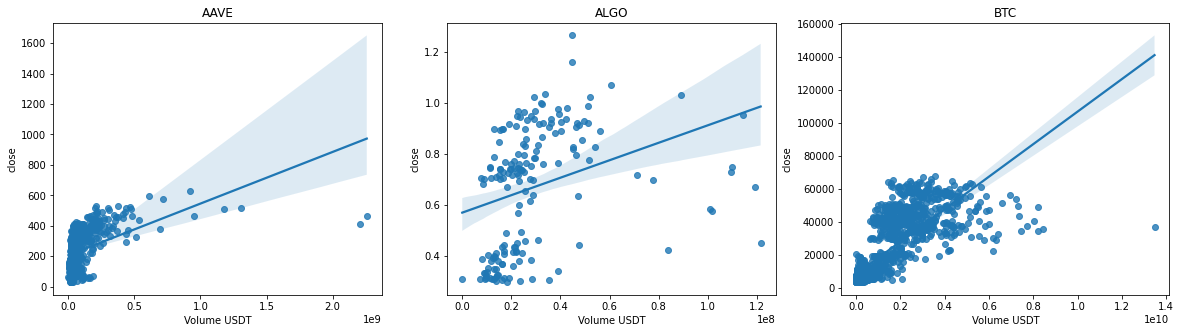

In [84]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.regplot(data=data_aave, x='Volume USDT', y='close')
plt.title('AAVE')

plt.subplot(1, 3, 2)
sns.regplot(data=data_algo, x='Volume USDT', y='close')
plt.title('ALGO')

plt.subplot(1, 3, 3)
sns.regplot(data=data_btc, x='Volume USDT', y='close')
plt.title('BTC')

Text(0.5, 1.0, 'SHIB')

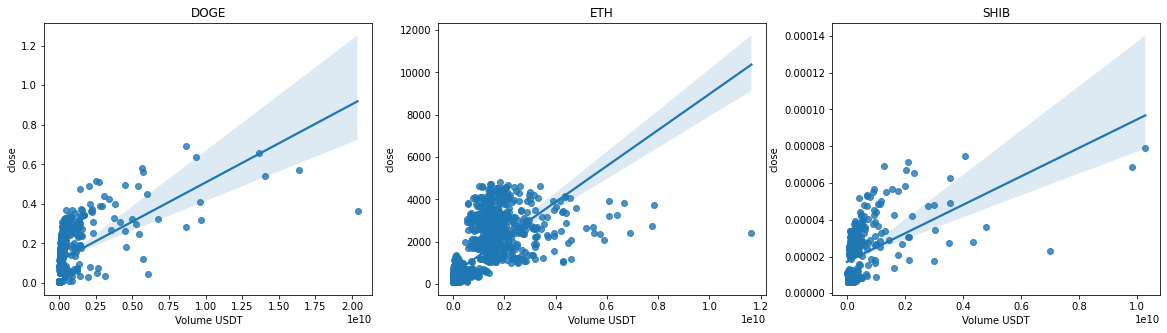

In [83]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.regplot(data=data_doge, x='Volume USDT', y='close')
plt.title('DOGE')

plt.subplot(1, 3, 2)
sns.regplot(data=data_eth, x='Volume USDT', y='close')
plt.title('ETH')

plt.subplot(1, 3, 3)
sns.regplot(data=data_shib, x='Volume USDT', y='close')
plt.title('SHIB')

From the 6 graph above:
- There are no significant correlation between closing price and volume
- This is because the distance or the margin between closing price and the line graph has a significant distance with each other

Text(0.5, 1.0, 'SHIB')

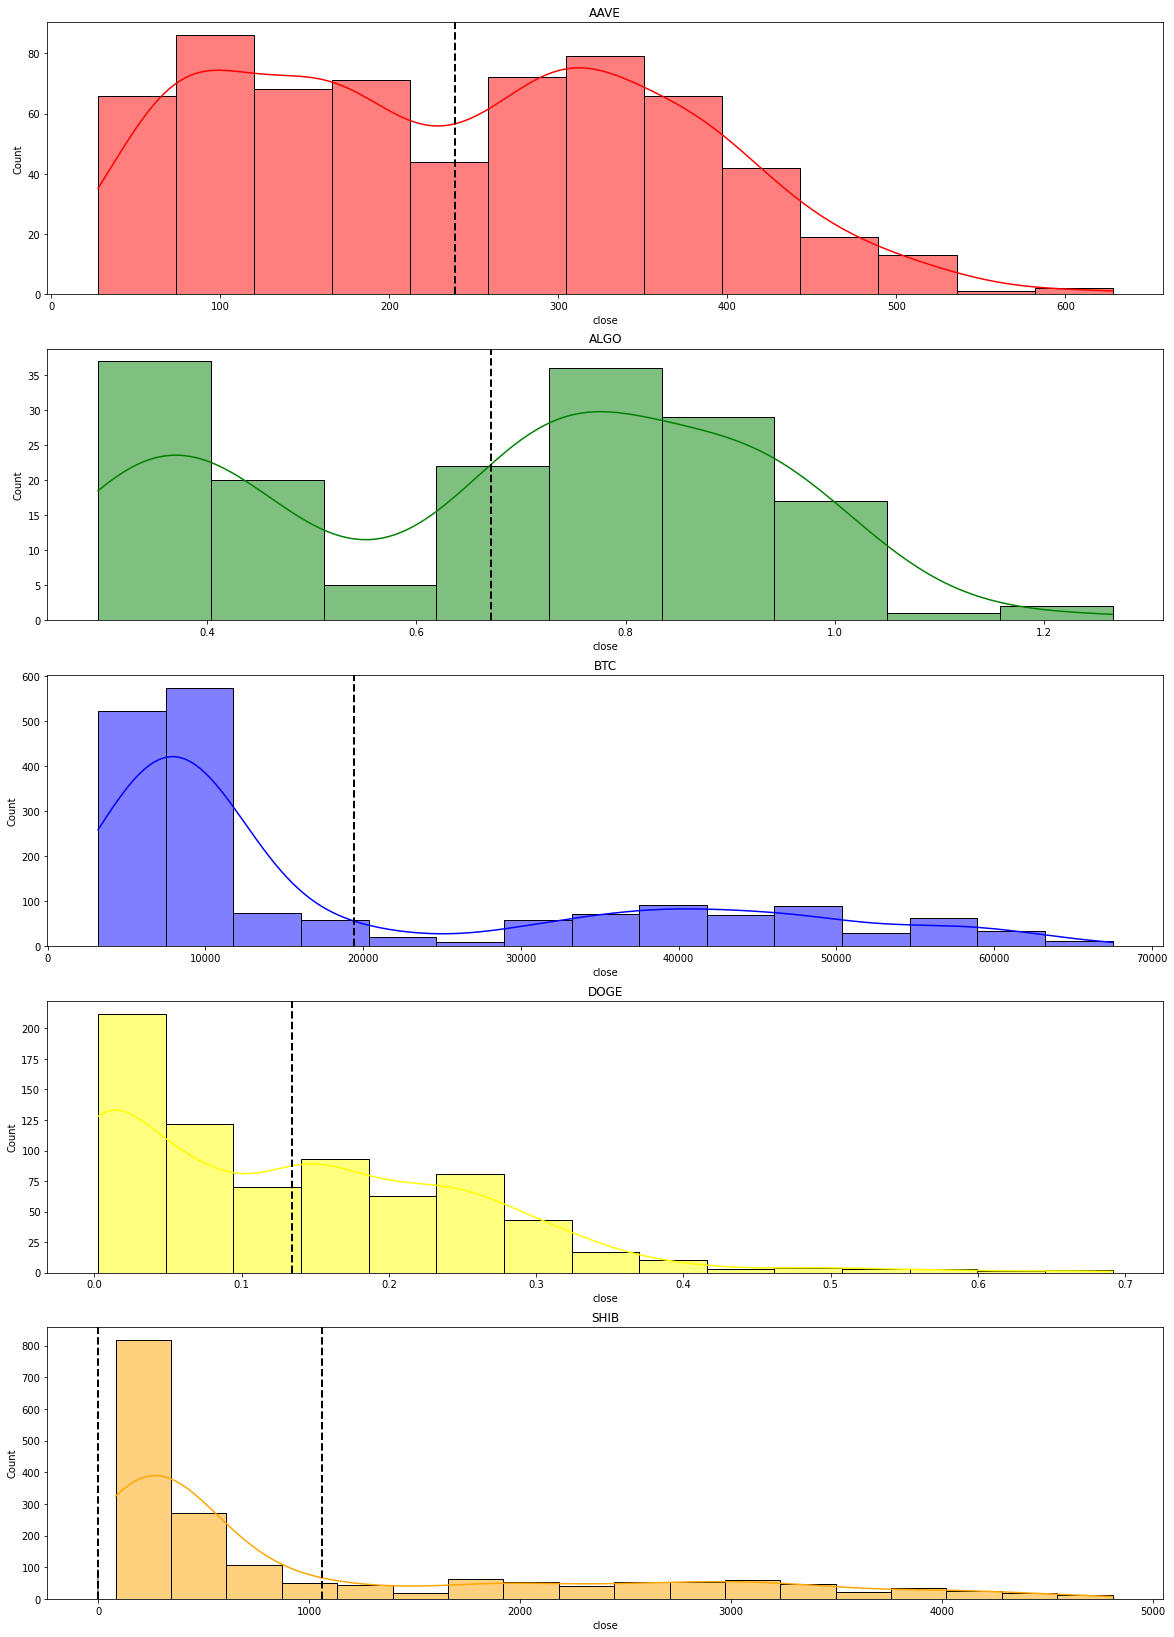

In [100]:
plt.figure(figsize = (20,35))

plt.subplot(6, 1, 1)
sns.histplot(data_aave['close'], color='red', kde=True)
plt.axvline(data_aave['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title('AAVE')

plt.subplot(6, 1, 2)
sns.histplot(data_algo['close'], color='green', kde=True)
plt.axvline(data_algo['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title('ALGO')

plt.subplot(6, 1, 3)
sns.histplot(data_btc['close'], color='blue', kde=True)
plt.axvline(data_btc['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title('BTC')

plt.subplot(6, 1, 4)
sns.histplot(data_doge['close'],color='yellow', kde=True)
plt.axvline(data_doge['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title('DOGE')

plt.subplot(6, 1, 5)
sns.histplot(data_eth['close'],color='orange', kde=True)
plt.axvline(data_eth['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title('ETH')

plt.subplot(6, 1, 5)
sns.histplot(data_shib['close'], color='grey', kde=True)
plt.axvline(data_shib['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title('SHIB')

From the histogram above we can say that:
- It is very rare for stock closing price to reach its highest value
- Most of the closing price is very low


## 5 - Summary

1. From the OHLC GRAPH :
- If the price reach its highest point, it means that the price during that period will have high volatility
- 2021 is the year/ period where all coins reach its highest price
- Jul 2022 is the period where all coins are at its lowest point since its highest period or 2021. 

2. From the Regplot, we can say that there are no correlation between volume and closing price
3. From the histogram, it can be say that it is very rare for the closing price of all types of coins to reach its highest value
